
# Lab | Random Forests  

For this lab, you will be using the CSV files provided in the `files_for_lab` folder.   

### Instructions  

- Apply the Random Forests algorithm but this time only by upscaling the data.  
- Discuss the output and its impact in the business scenario.   

Is the cost of a false positive equals to the cost of the false negative?  
How would you change your algorithm or data in order to maximize the return of the business?


In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# load data from csv files
numeric_data = pd.read_csv('./files_for_lab/numerical.csv')
categorical_data = pd.read_csv('./files_for_lab/categorical.csv')
target_data = pd.read_csv('./files_for_lab/target.csv')

In [4]:
# assemble data as a single dataframe
HC4A_data = pd.concat([numeric_data, categorical_data, target_data], axis =1)
HC4A_data.shape

(95412, 339)

In [5]:
# check the balance of data based on the label TARGET_B
HC4A_data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [6]:
# apply upsampling to balance the data
category_0 = HC4A_data[HC4A_data['TARGET_B'] == 0]
category_1 = HC4A_data[HC4A_data['TARGET_B']==1].sample(len(HC4A_data[HC4A_data['TARGET_B'] == 0]), replace = True)

print(category_0.shape)
print(category_1.shape)

(90569, 339)
(90569, 339)


In [7]:
# reassemble the dataframe with upsampled rows
balanced_data = pd.concat([category_0,category_1], axis = 0).reset_index()
print(balanced_data.shape)
balanced_data.head()

(181138, 340)


,index,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11,0,0.0
1,1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10,0,0.0
2,2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,

In [8]:
# separate features and targets
X = balanced_data.drop(['TARGET_B', 'TARGET_D'], axis = 1)
y = balanced_data['TARGET_B']



In [9]:
# One Hot Encode categorical data
X_categorical = X.select_dtypes('object')
X_numerical = X.select_dtypes('int64','float64')
OH_encoder = OneHotEncoder(drop = 'first').fit(X_categorical)
X_categoricals_enc = pd.DataFrame(OH_encoder.transform(X_categorical).toarray())
X_categoricals_enc.head() 
X_data = pd.concat([X_numerical,X_categoricals_enc], axis = 1)


In [10]:
# split data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_data, y, test_size = 0.3, random_state = 23 )
print(X_train.shape)
print(X_val.shape)

(126796, 346)
(54342, 346)


In [11]:
# instantiate model
RFmodel = RandomForestClassifier(max_depth = 10, min_samples_split = 20 , min_samples_leaf = 20)
RFmodel.fit(X_train, y_train)
# get cross validation scores on training data
training_cross_vals = cross_val_score(RFmodel, X_train, y_train, cv = 10)
print('Training sets: ', '\nSTD = ', np.std(training_cross_vals), '\nMean Score = ', np.mean(training_cross_vals))

test_cross_vals = cross_val_score(RFmodel, X_val,y_val, cv = 10)
print('Test sets: ', '\nSTD = ', np.std(test_cross_vals), '\nMean Score = ', np.mean(test_cross_vals))

Training sets:  
STD =  0.004076416755293002 
Mean Score =  0.8141109625618557
Test sets:  
STD =  0.0034545348499031175 
Mean Score =  0.7664974322631806


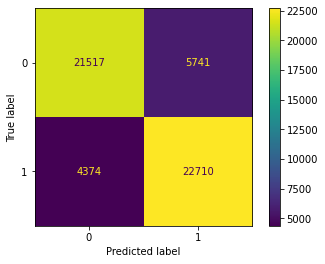

In [15]:
# create a confusion matrix to determine the number of false positives vs true positives 
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt 
%matplotlib inline
cfmatrix = confusion_matrix(y_val,RFmodel.predict(X_val))
cfmatrix

plot_confusion_matrix(RFmodel, X_val, y_val)  
plt.show()  

In [32]:
# cost of mail packages is $0.68.
# relative cost of false positive i.e. identifying a someone who will not donate as a donor is therefore $0.68
false_positives = cfmatrix[0,1]
package_cost = 0.68
cost_false_positive = false_positives*package_cost
print('Cost of False Positives: $', np.round(cost_false_positive,2))

Cost of False Positives: $ 3903.88


In [35]:
# find the average donation based on the donors who do donate.
donations = HC4A_data[HC4A_data['TARGET_D'] != 0.0]
mean_donation = np.mean(donations['TARGET_D'])
# determine the cost of false negatives
false_negatives = cfmatrix[1,0]
cost_false_negatives = false_negatives*mean_donation
print('Cost of False Negatives: $', np.round(cost_false_negatives,2))

Cost of False Negatives: $ 68340.88


15.624344414619037

# Conclusion:

While the cost of false positives is $0.68, the average cost of a false negative is $15.62.  
Given this, it may be advisable to risk the loss of some money by sending packages to incorrectly identified donors,  
rather than losing out on potential donations from interested persons who may donate.

To improve the model it might be preferable to weight false negatives more, 
we can do this by assigning greater importance to correctly identifying True positives.